In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt
# simulate the infected patients number for a specific period T_total
# this function simulate not strictly numbers of X_n in T_total time, given fixed Lambda, P, Alpha
# Random Horizon: means that the whole trajectory stop once X_n hits 0
# @ param N: is the number of total population can be infected
# @ param t_0: a number that is the time when starting the T-time simulation
# @ param x_0: initial infected patients (greater than 0)
# @ param T_total: is total time for this simulation
# @ param maxi_time: is the maximum time that the whole simulation process can go, can be infinity
# @ param H: is the hospital capacity
def simulation_infected(la, p, al, N, t_0, x_0, T_total, H, maxTime):
    # initialize time and infected patient
    # bind variables to the initial conditions
    x_n = x_0
    # make sure the start is not 0
#     assert(x_n!=0)
    # assign initial time to a know value, noted it can start from
    # not just at 0 time
    t_n = t_0
    # introduce T_H := "the total time above the hospital capacity"
    T_H = 0
    # initiate X_n process trajectory and corresponding T_n process
    X_trajectory = []
    T_trajectory = []
    # loop
    # break condition
    # @ condition1: when the time exceeds the maximum time
    # @ condition2: when the infected patients go to zero
    # @ condition3: when the whole populations are infected! :(
    while (x_n != 0 and
           x_n < N
          ):
        i = x_n
        # q i _ i+1
        q_forward_i = la*p*2*x_n*(N-i)/(N*(N-1))
        # q i _ i-1
        q_backward_i = al*i
        # waiting time rate v_i = (q i _ i+1) + (q i _ i-1)
        v_i = q_forward_i + q_backward_i
        t_i = np.random.exponential(v_i)
        t_n = t_n+t_i
        # calculate T_H before jumping
        if (x_n >= H):
            # makes sure T_H don't exceed T_total
            T_H = min(T_total ,T_H+t_i)

        if ((t_n-t_0) > T_total):
            # take the unjumped x_n
            # take the truncated T (multiple of 14)
            X_trajectory.append(x_n)
            T_trajectory.append(T_total+t_0)
            return X_trajectory, T_trajectory, T_H, T_total
        
        elif ((t_n-t_0) < T_total):
            # jumping probability to STATE i+1 is (q i _ i+1)/v_i
            jump = np.random.binomial(n=1,p=(q_forward_i/v_i))
        
            # change x_n
            if (jump ==1):
                x_n += 1
            elif (jump == 0):
                x_n -= 1            
        
            # add the jumped X_n at t_i time
            X_trajectory.append(x_n)
            # increase time
            T_trajectory.append(t_n)

        
            # if hits then zero return
            if (x_n == 0):
                return X_trajectory, T_trajectory, T_H, T_total        
    print("loop break")
#     # also return when the while break condition met
#     return X_trajectory, T_trajectory, T_H, T_total

In [ ]:
# function takes that updates lambda with negative sign
def update_lambda(_lambda, T_H, T, Beta ,stepsize):
    Y_n = T_H/T
    _lambda -= float(stepsize) * (Y_n-Beta)
    return _lambda

# function that updates p with negative sign
def update_p(_p, T_H, T, Beta, stepsize):
    Y_n = T_H/T
    _p -= float(stepsize) * (Y_n-Beta)
    return _p

# function that updates alpha with positive sign
def update_alpha(_alpha, T_H, T, Beta, stepsize):
    Y_n = T_H/T
    _alpha += float(stepsize) * (Y_n-Beta)
    return _alpha

# @ x_0 initial infected patient
# @ _lambda the inital lambda value
# @ _alpha the inital alpha value
# @ p the inital p value 
# @ C is the hospital capacity 
# @ Beta is the target tracking probability 
# @ K is the batch size of each estimate
# @ The batch is defined here as the total K days of simulation starting from a time point
# @ It is not defined as the number of replications of each simulation with T days
# these are all set arbitary atm
x_0 = 10
_lambda = 0.1
_alpha = 1e-8
_p = 0.9
K = 14
H = 2e4
Beta = 0.05
N = 4e6
maxTime = 3e4                                            
stepsize = [0.00001, 2e-10]


trajectory_lambda = []
trajectory_alpha = []
trajectory_X_n = []
trajectory_T_n = []
# use iteration of 5000 as end of all sequential update
iteration = 0
x_n = x_0
t_n = 0

while iteration < 10000:
    
    # simulate K days of X_n obtain T_H/T, starting from t_0 = 0 and x_0 = x_n
    X_n,T_n,T_H,T = simulation_infected(_lambda,_p,_alpha,N,t_n,x_n,K,H,maxTime)
    
    pr = T_H/T
    if (pr>1):
        print(pr)
    
    # use K days simulation to update lambda and alpha
    _alpha = max(0,update_alpha(_alpha,T_H,T,Beta,stepsize[1]))
    _lambda = max(0, update_lambda(_lambda,T_H,T,Beta,stepsize[0]))
    
    # update the objective simulation trajectory
    trajectory_alpha.append(_alpha)
    trajectory_lambda.append(_lambda)
    trajectory_X_n.extend(X_n)
    trajectory_T_n.extend(T_n)
    
    # update x_n and t_n using the last (latest) element of objective simulation X_n and T_n
    x_n = X_n[-1]
    t_n = T_n[-1]
    
    # if x_n is zero, jump up to x_0, restart simulation
    if (x_n==0):
        x_n = x_0

    
    iteration+=1
    

0.7641269033079489
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1

In [101]:
trajectory_T_n[-1]

66069.2347116224

In [6]:
trajectory_X_n[-1]

0

In [69]:
trajectory_alpha

[9.999e-09]

In [ ]:
plt.xlabel("the time by day")
plt.ylabel("value of lambda")
plt.title("trajectory of lambda")
plt.plot(trajectory_lambda)
# plt.savefig("trajectory of lambda, experiment3, 2e4")

In [ ]:
plt.clf()
plt.plot(trajectory_alpha)
# plt.savefig("trajectory of alpha, experiment3, 2e4")

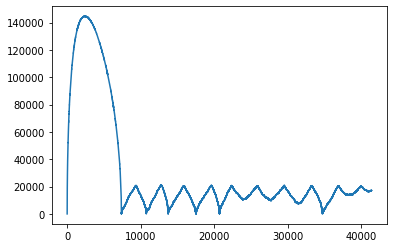

In [17]:
plt.plot(trajectory_T_n,trajectory_X_n)
# plt.savefig("trajectory of simulation, experiment3, 2e4")

In [55]:
len(trajectory_X_n)

2866548

In [53]:
len(trajectory_X_n)

2919245